# 1. EDA

In [1]:
#Imports for EDA
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#Read data
df = pd.read_json('ultimate_data_challenge.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
#Set date columns dtypes
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [5]:
df.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000,41878.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,2014-01-16 13:04:20.352000,4.601559,1.074764,2014-04-19 08:02:04.992000256,8.849536,60.926084,5.796827,4.778158
min,0.000000,2014-01-01 00:00:00,1.000000,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2014-01-09 00:00:00,4.300000,1.000000,2014-02-14 00:00:00,0.000000,33.300000,2.420000,4.700000
50%,1.000000,2014-01-17 00:00:00,4.900000,1.000000,2014-05-08 00:00:00,0.000000,66.700000,3.880000,5.000000
75%,3.000000,2014-01-24 00:00:00,5.000000,1.050000,2014-06-18 00:00:00,8.600000,100.000000,6.940000,5.000000
max,125.000000,2014-01-31 00:00:00,5.000000,8.000000,2014-07-01 00:00:00,100.000000,100.000000,160.960000,5.000000
std,3.792684,NaN,0.617338,0.222336,NaN,19.958811,37.081503,5.707357,0.446652


In [6]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [7]:
#Create boolean column for activity in the sixth month
df['active_in_sixth'] = df['last_trip_date'].dt.month_name().isin(['June', 'July'])
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_in_sixth
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


Text(0.5, 1.0, 'Number of Users Active in Sixth Month')

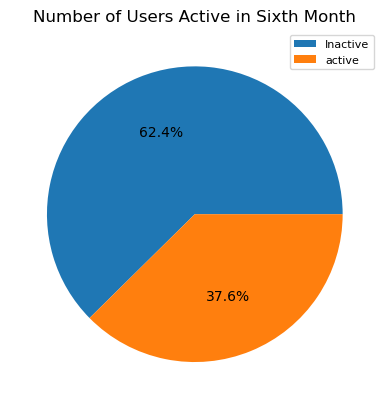

In [8]:
#Plot ratio of riders active vs inactive in their sixth month
df['active_in_sixth'].value_counts().plot.pie(autopct='%1.1f%%', ylabel='', legend=True, labeldistance=None)
plt.legend(['Inactive', 'active'], prop={'size': 8})
plt.title('Number of Users Active in Sixth Month')

In [9]:
#Create a df of all null values for 'avg_rating_of_driver
null_avg_rating = df[df['avg_rating_of_driver'].isnull() == True]
null_avg_rating.reset_index(inplace=True)
null_avg_rating.describe()

,index,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,8122.000000,8122.000000,8122,0.0,8122.000000,8122,8122.000000,8122.000000,8122.000000,8055.000000
mean,25079.305344,0.593327,2014-01-16 22:06:42.462447360,NaN,1.078210,2014-03-24 11:53:58.315685632,8.548067,59.050948,7.506267,4.785984
min,6.000000,0.000000,2014-01-01 00:00:00,NaN,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000
25%,12607.000000,0.000000,2014-01-10 00:00:00,NaN,1.000000,2014-01-26 00:00:00,0.000000,0.000000,2.410000,5.000000
50%,25313.000000,1.000000,2014-01-18 00:00:00,NaN,1.000000,2014-03-16 00:00:00,0.000000,100.000000,4.715000,5.000000
75%,37468.250000,1.000000,2014-01-25 00:00:00,NaN,1.000000,2014-05-22 00:00:00,0.000000,100.000000,10.720000,5.000000
max,49999.000000,5.000000,2014-01-31 00:00:00,NaN,5.000000,2014-07-01 00:00:00,100.000000,100.000000,160.960000,5.000000
std,14409.821163,0.606755,NaN,NaN,0.310306,NaN,26.578461,46.859739,7.758616,0.622122


Text(0.5, 1.0, 'Number of Users With No Avg Rating Active in Sixth Month')

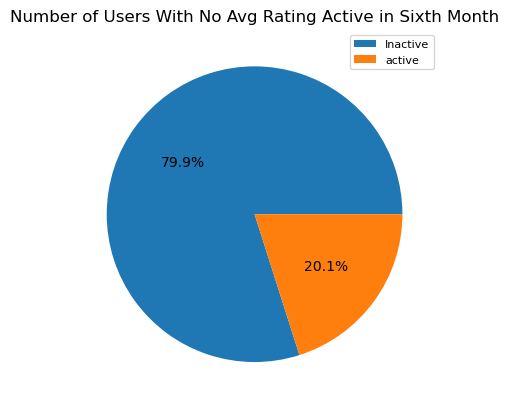

In [10]:
#plot the ratio of null 'avg_rating_of_driver' riders active after 6 months
null_avg_rating['active_in_sixth'].value_counts().plot.pie(autopct='%1.1f%%', ylabel='', legend=True, labeldistance=None)
plt.legend(['Inactive', 'active'], prop={'size': 8})
plt.title('Number of Users With No Avg Rating Active in Sixth Month')

The 75% quartile rider's last trip was less than six months from their account creation date and they averaged less than one trip in their first 30 days.

In [11]:
#Describe the data for 'avg_rating_of_driver'
non_null_avg_rating = df[df['avg_rating_of_driver'].isnull() == False]
non_null_avg_rating.reset_index(inplace=True)
non_null_avg_rating.describe()

,index,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,41878.000000,41878.000000,41878,41878.000000,41878.000000,41878,41878.000000,41878.000000,41878.000000,41744.000000
mean,24984.022207,2.604972,2014-01-16 11:19:08.994699008,4.601559,1.074095,2014-04-24 08:18:23.089928192,8.908004,61.289756,5.465290,4.776648
min,0.000000,0.000000,2014-01-01 00:00:00,1.000000,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000
25%,12481.250000,0.000000,2014-01-09 00:00:00,4.300000,1.000000,2014-02-23 00:00:00,0.000000,37.500000,2.420000,4.700000
50%,24940.000000,1.000000,2014-01-17 00:00:00,4.900000,1.000000,2014-05-16 00:00:00,0.000000,66.700000,3.790000,5.000000
75%,37503.750000,3.000000,2014-01-24 00:00:00,5.000000,1.070000,2014-06-20 00:00:00,11.100000,100.000000,6.490000,5.000000
max,49998.000000,125.000000,2014-01-31 00:00:00,5.000000,8.000000,2014-07-01 00:00:00,100.000000,100.000000,79.690000,5.000000
std,14438.687323,4.055311,NaN,0.617338,0.200861,NaN,18.401140,34.858046,5.151833,0.404109


Text(0.5, 1.0, 'Number of Users With Avg Rating Active in Sixth Month')

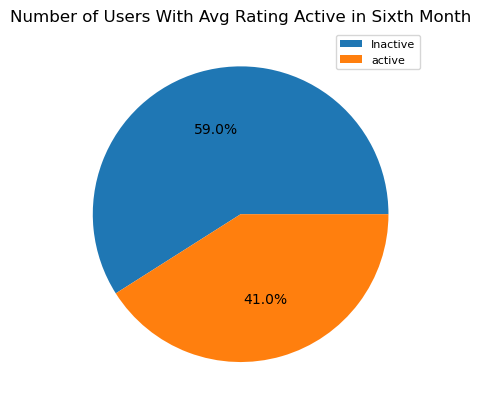

In [12]:
#Create a df of all non null values for 'avg_rating_of_driver
non_null_avg_rating['active_in_sixth'].value_counts().plot.pie(autopct='%1.1f%%', ylabel='', legend=True, labeldistance=None)
plt.legend(['Inactive', 'active'], prop={'size': 8})
plt.title('Number of Users With Avg Rating Active in Sixth Month')

Riders who do not have null avg_rating_of_driver average 2 more trips in their first 30 days.

In [13]:
#Unique values of city
df.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [14]:
#Unique values for phones
df.phone.unique()

array(['iPhone', 'Android', None], dtype=object)

Text(0.5, 1.0, 'Number of Ultimate Black Users')

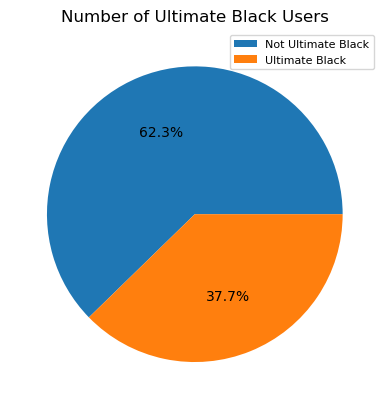

In [15]:
#plot the ratio of Ultimate Black Users to Non Ultimate Black Users
df['ultimate_black_user'].value_counts().plot.pie(autopct='%1.1f%%', ylabel='', legend=True, labeldistance=None)
plt.legend(['Not Ultimate Black', 'Ultimate Black'], prop={'size': 8})
plt.title('Number of Ultimate Black Users')

In [16]:
#Ratio of Ultimate Black Users who were active after 6 months
six_month_users = df[df['active_in_sixth']]
counts = six_month_users['ultimate_black_user'].value_counts()
ratios = round(counts / counts.sum(),2)
print(ratios)

ultimate_black_user
True     0.51
False    0.49
Name: count, dtype: float64


# 2. Predictive Model

There are multiple classifier models that can perform well when predicting customer churn. the most common models recommended are Logistic Regression, Decision trees, Random Forest, and Gradient Boosting Machines (GBM).  I opted for The Random Forest in this example because I thought it would have greater accuracy over Decision Trees and Logistic Regression while also rquiring less tuning than GBM.

In [17]:
#Imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

In [18]:
#Fill NA values
df['phone'].fillna('None', inplace=True)
df['avg_rating_of_driver'].fillna(3, inplace=True)
df['avg_rating_by_driver'].fillna(3, inplace=True)

C:\Users\Josh\AppData\Local\Temp\ipykernel_24528\214825601.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['phone'].fillna('None', inplace=True)
C:\Users\Josh\AppData\Local\Temp\ipykernel_24528\214825601.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [19]:
#Info post NA fill
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  active_in_sixth         50000 non-null  bool  

In [20]:
#drop date columns
df_data = df.drop(labels=['last_trip_date', 'signup_date'], axis=1)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  active_in_sixth         50000 non-null  bool   
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 3.5+ MB


In [21]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  active_in_sixth         50000 non-null  bool   
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 3.5+ MB


In [22]:
#Set bool columns to 1/0 values
df_data['ultimate_black_user'] = df_data['ultimate_black_user'].astype(int)
df_data['active_in_sixth'] = df_data['active_in_sixth'].astype(int) 

In [23]:
#Create X and y
X = df_data.drop(columns='active_in_sixth')
y = df_data['active_in_sixth']

In [24]:
#Create train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#Set categorical and numerical columns lists
categorical_cols = ['city', 'phone']
numerical_cols = X.columns.difference(['city', 'phone'])

In [26]:
#Scale numerical data
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_num_scaled = scaler.transform(X_test[numerical_cols])

In [27]:
type(X_train_num_scaled)

numpy.ndarray

In [28]:
#Encode categorical data
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_cat_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_cat_encoded = encoder.transform(X_test[categorical_cols])

C:\Anaconda3\envs\notebook\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
#recombining the numerical and categorical data
X_train_preprocessed = np.concatenate((X_train_num_scaled, X_train_cat_encoded), axis=1)
X_test_preprocessed = np.concatenate((X_test_num_scaled, X_test_cat_encoded), axis=1)

In [30]:
#Initialize RandomForestClassifier and train the model
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_preprocessed, y_train)

RandomForestClassifier(random_state=42)

In [31]:
#Make predictions
y_pred = rf_model.predict(X_test_preprocessed)

In [32]:
#Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.749


AUC-ROC: 0.7302350310807939


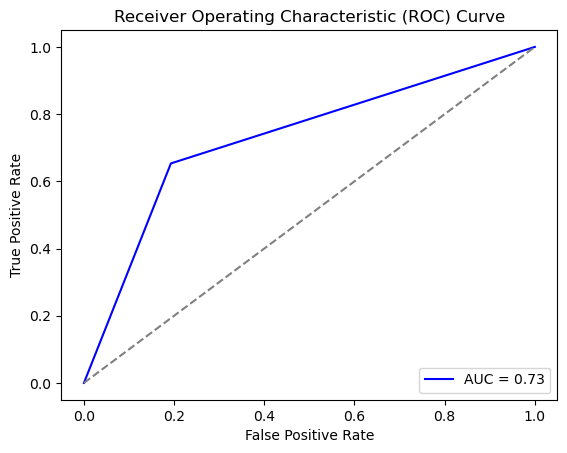

In [33]:
#Calculate AUC score
auc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc)

#calculate the ROC Curve and plot it
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The model got an accuracy score of 74.9% and a AUC-ROC score of .76 indicating the model does much better than random guess and has the ability to classify the riders in this dataset effectively. I would not expect this model to perform as well on a new dataset. This dataset is concentrated on the cohort that started in January and finished on July 1st. Any underlying patterns the model learned may only apply to that group of custoemrs and be of little value in analyzing another group.

# 3. Leveraging the Model

A Model that is trained more broadly across a larger population of the riders would provide greater insight into the possible featuers that could most strongly indicate whether a customer is active after 6 months. A model that could accuaretly predict whether riders continued riding into their sixth month and beyond could allow the company to to do more to targe those riders with incentives to continue riding. Another way this model could be leveraged is if it could help the company identify more easily a core demographic to advertise to.

In [34]:
import os

#Deleteing the dataset as instructed
file_path = "ultimate_data_challenge.json"

# Check if the file exists
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"{file_path} has been deleted.")
else:
    print(f"{file_path} does not exist.")

ultimate_data_challenge.json has been deleted.
